In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
from datetime import date
import datetime as dt
import math


import collections
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.tokenize import RegexpTokenizer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import json
from pandas.io.json import json_normalize
from ast import literal_eval

import matplotlib.pyplot as plt

######################################################
# Jupyter view adjustmets
from IPython.core.display import display, HTML #Increase the code window width
display(HTML("<style>.container { width:100% !important; }</style>")) #Increase the code window width
pd.set_option('expand_frame_repr', False) #keep columns inline withouth wrapping to the next line

######################################################

###### Download movie data
df1 = pd.read_csv('/Users/HF/Documents/Springboard/0_Capstone_2/tmdb_5000_credits.csv', low_memory=False)
df2 = pd.read_csv('/Users/HF/Documents/Springboard/0_Capstone_2/tmdb_5000_movies.csv', low_memory=False)

df1.columns = ['id','tittle','cast','crew']

df= df2.merge(df1,on='id')
print(df.shape)
print(df.columns)

(4803, 23)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')


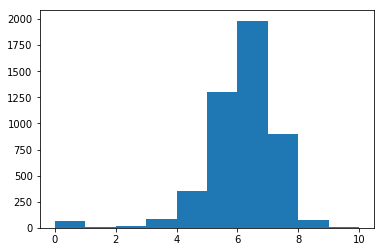

In [2]:
#Analyze average vote
plt.hist(df['vote_average'], bins = 10)
plt.show()

 - The distribution of viewers' votes is slightly skewed to the left - majority of the votes are 7 (41%), then 6 (27%) and third - 8 (19%)
 - 87% of all the movies are rated as 6 and above.
 - Very few movies (0.1%) received the average rating of 10.
 - About 1% of the movies received the average rating of 0.


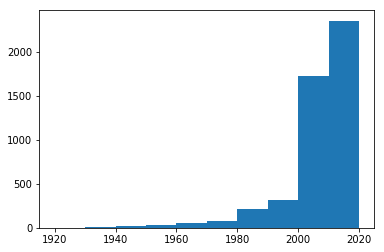

In [3]:
df2['decade'] = df['release_date'].apply(lambda x:(((float(str(x)[:4]))-1900)/10))

df2 = round(df2['decade'].dropna())*10+1900
plt.hist(df2, bins = 10)
plt.show()

- 90% the movies in the database have been released between 2000 and 2019.

In [11]:
# Keep only the fileds required for recommender
df = df[['title', 'genres','keywords', 'cast', 'crew']]
print(df.shape)

(4803, 5)


In [13]:
movie = input('Enter the movie: ')
# 'Avengers: Age of Ultron'

# fantasy action adventure dualident amnesia

Enter the movie: Avengers: Age of Ultron


In [14]:
movie_count = df['title'].str.contains(movie).sum()
if movie_count==0:
    print ("No such movie in the data. Please add info below")
    m_genre = input ("Enter movie genre:")
    m_director = input ("Enter movie director:")
    m_crew = input ("Enter movie crew:")
    # Create reciord of a new movie
    df_new = pd.DataFrame(columns=['title', 'bow'])
    df_new.append(pd.Series(), ignore_index=True)
    df_new = df_new.append({'title' : str(movie) , \
                        'bow' : (str(m_genre)+" "+str(m_director)+" "+str(m_crew))} , ignore_index=True)



# Process Features

In [15]:
# Create dataframe copy
df_cont = df.copy()

#Convert features to the list object
features = ['genres', 'keywords', 'cast', 'crew']
for feature in features:
    df_cont[feature] = df_cont[feature].apply(literal_eval)
    
print(df_cont['genres'].head())  

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object


In [16]:
# Create the director field
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df_cont['director'] = df_cont['crew'].apply(get_director)

print(df_cont['director'].head())  

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object


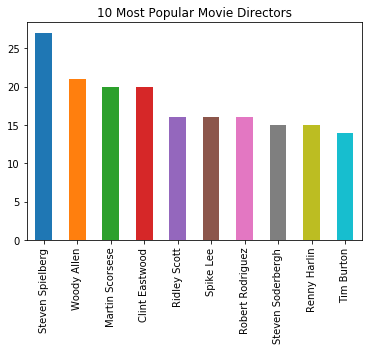

In [17]:
# Analyze director field
df_d = df_cont['director'].value_counts().head(10)
df_d.plot.bar()
plt.title("10 Most Popular Movie Directors")
plt.show()

- Most famous movie directors have the highest number of movies in the database.